# Ensemble Learning:
Implement Random Forest Classifier model to predict the safety of the car. 

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
car_data = pd.read_csv("car_evaluation.csv")
car_data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
car_data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
car_data.shape

(1727, 7)

In [5]:
car_data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [6]:
car_data.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [7]:
car_data.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class']
print(car_data.head())

  Buying  Maint Doors Persons Lug_boot Safety  Class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc


In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1727 non-null   object
 1   Maint     1727 non-null   object
 2   Doors     1727 non-null   object
 3   Persons   1727 non-null   object
 4   Lug_boot  1727 non-null   object
 5   Safety    1727 non-null   object
 6   Class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
# Renaming the columns for better understanding
car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [10]:
# Label encoding the categorical columns
le = LabelEncoder()
for col in car_data.columns:
    car_data[col] = le.fit_transform(car_data[col])

In [11]:
# Defining features (X) and target (y)
X = car_data.drop('class', axis=1)
y = car_data['class']

In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Implementing the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Making predictions
y_pred = rfc.predict(X_test)

In [15]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [16]:
# Output results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", classification_rep)


Accuracy: 96.53%
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       118
           1       0.92      0.71      0.80        17
           2       0.98      1.00      0.99       361
           3       0.78      0.91      0.84        23

    accuracy                           0.97       519
   macro avg       0.91      0.88      0.89       519
weighted avg       0.97      0.97      0.96       519



In [17]:
# Feature Importance
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

In [18]:
# Print feature importance
print("Feature Importance Ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]}: {importances[indices[f]]}")

Feature Importance Ranking:
1. Feature safety: 0.27685312135727863
2. Feature persons: 0.2223892456419553
3. Feature buying: 0.1880687579193047
4. Feature maint: 0.15914492305806605
5. Feature lug_boot: 0.08416120455747186
6. Feature doors: 0.06938274746592343


Accuracy: 96.53%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       118
           1       0.92      0.71      0.80        17
           2       0.98      1.00      0.99       361
           3       0.78      0.91      0.84        23

    accuracy                           0.97       519
   macro avg       0.91      0.88      0.89       519
weighted avg       0.97      0.97      0.96       519


Feature Importance Ranking:
1. Feature safety: 0.2769
2. Feature persons: 0.2224
3. Feature buying: 0.1881
4. Feature maint: 0.1591
5. Feature lug_boot: 0.0842
6. Feature doors: 0.0694


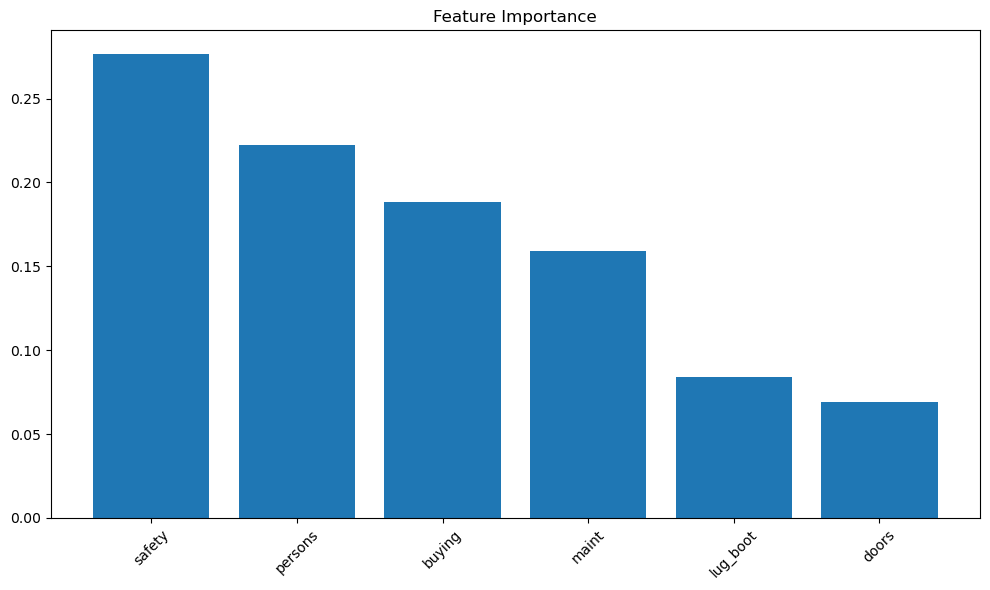


Enter the car details below:

Valid values for buying: vhigh, high, med, low
Enter buying: high

Valid values for maint: vhigh, high, med, low
Enter maint: med

Valid values for doors: 2, 3, 4, 5more
Enter doors: 3

Valid values for persons: 2, 4, more
Enter persons: 4

Valid values for lug_boot: small, med, big
Enter lug_boot: small

Valid values for safety: low, med, high
Enter safety: low

Predicted car evaluation class: unacc


D:\Users\shrey\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:


# Load and prepare the data
try:
    car_data = pd.read_csv("car_evaluation.csv")
except FileNotFoundError:
    print("Error: car_evaluation.csv file not found in the current directory")
    exit()

# Set column names
car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Create a dictionary to store label encoders for each column
label_encoders = {}

# Label encoding the categorical columns
for column in car_data.columns:
    label_encoders[column] = LabelEncoder()
    car_data[column] = label_encoders[column].fit_transform(car_data[column])

# Defining features (X) and target (y)
X = car_data.drop('class', axis=1)
y = car_data['class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implementing the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Making predictions
y_pred = rfc.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_rep)

# Feature Importance
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature importance
print("\nFeature Importance Ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

# Define valid inputs for prediction
valid_inputs = {
    'buying': ['vhigh', 'high', 'med', 'low'],
    'maint': ['vhigh', 'high', 'med', 'low'],
    'doors': ['2', '3', '4', '5more'],
    'persons': ['2', '4', 'more'],
    'lug_boot': ['small', 'med', 'big'],
    'safety': ['low', 'med', 'high']
}

# Get user inputs with validation
input_data = {}
print("\nEnter the car details below:")

for feature, valid_values in valid_inputs.items():
    while True:
        print(f"\nValid values for {feature}: {', '.join(valid_values)}")
        value = input(f"Enter {feature}: ").strip().lower()
        if value in valid_values:
            input_data[feature] = value
            break
        else:
            print(f"Invalid input! Please enter one of: {', '.join(valid_values)}")

# Encode user input
input_data_encoded = []
try:
    for feature in input_data.keys():
        le = label_encoders[feature]
        input_data_encoded.append(le.transform([input_data[feature]])[0])

    # Make prediction
    prediction = rfc.predict([input_data_encoded])
    predicted_class = label_encoders['class'].inverse_transform(prediction)[0]
    print(f"\nPredicted car evaluation class: {predicted_class}")
except Exception as e:
    print(f"Error during prediction: {str(e)}")